https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
aaaa = pd.read_csv('data/train_data/1.csv', header = None)

###### Train Set

In [3]:
import numpy as np
import pandas as pd 

# x train
x_train1 = np.load('2000Hz 파형만_npz/x_train.npz1.npz')['arr_0']
x_train2 = np.load('2000Hz 파형만_npz/x_train.npz2.npz')['arr_0']
x_train3 = np.load('2000Hz 파형만_npz/x_train.npz3.npz')['arr_0']
x_train4 = np.load('2000Hz 파형만_npz/x_train.npz4.npz')['arr_0']

# x concat
x_train = np.concatenate((x_train1,x_train2))
x_train = np.concatenate((x_train,x_train3))
x_train = np.concatenate((x_train,x_train4))

# y
y_train1 = np.load('2000Hz 파형만_npz/y_train.npz1.npz')['arr_0']
y_train2 = np.load('2000Hz 파형만_npz/y_train.npz2.npz')['arr_0']
y_train3 = np.load('2000Hz 파형만_npz/y_train.npz3.npz')['arr_0']
y_train4 = np.load('2000Hz 파형만_npz/y_train.npz4.npz')['arr_0']

#y concat
y_train = np.concatenate((y_train1,y_train2))
y_train = np.concatenate((y_train,y_train3))
y_train = np.concatenate((y_train,y_train4))

del x_train1, x_train2, x_train3, x_train4 , y_train1, y_train2, y_train3, y_train4

##### Test Set

In [4]:
x_test = pd.read_csv('data/test2_x.csv').loc[:,'abp_1':].values

x_test

array([[ 94.73,  93.75,  91.8 , ..., 137.7 , 136.72, 134.77],
       [ 61.52,  61.52,  59.57, ...,  94.73,  94.73,  93.75],
       [ 75.12,  75.12,  75.12, ...,  77.1 ,  76.11,  76.11],
       ...,
       [ 83.98,  83.01,  82.03, ...,  83.98,  83.98,  83.01],
       [ 71.17,  72.16,  71.17, ...,  96.85, 105.74, 111.66],
       [ 86.97,  85.  ,  85.99, ...,  98.82,  98.82,  97.84]])

##### reshape

In [5]:
# y_train = y_train.reshape(y_train.shape[0],1)
# y_train = y_train.astype('int')

# x_train_t = x_train.reshape(x_train.shape[0] , 2000 , 1)
# x_test_t = test_X.reshape(test_X.shape[0], 2000, 1)
# x_train_t.shape

###### 결측치 제거

In [6]:
# #train
# x_train = x_train[~np.isnan(x_train).any(axis=1), :]
# y_train = y_train[np.where(~np.isnan(x_train).any(axis=1))]
# print(x_train.shape, y_train.shape)


# #test
# x_test = x_test[~np.isnan(x_test).any(axis=1), :]
# x_test.shape

# #y 형변환
# y_train = y_train.astype(int)

In [7]:
import pandas as pd

test = pd.read_csv('data/test2_x.csv')

<AxesSubplot:title={'center':'Test set Second Row'}>

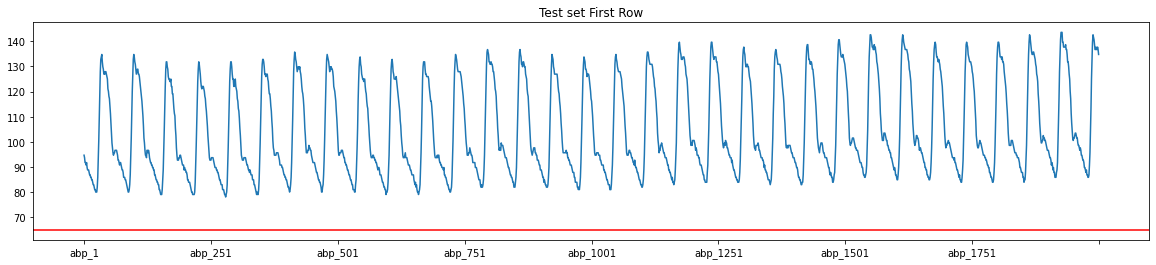

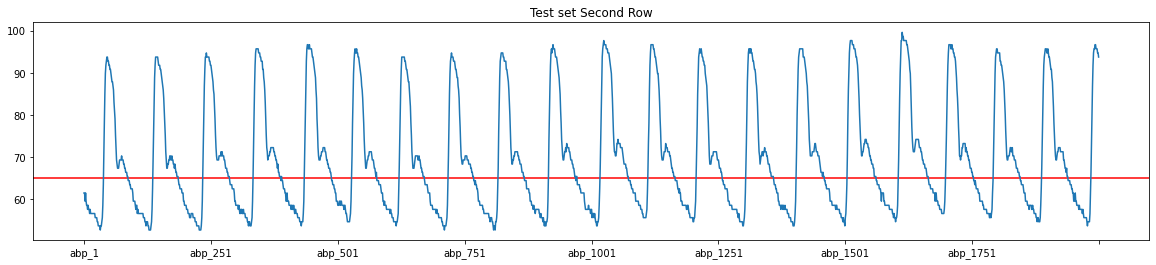

In [8]:
plt.figure(figsize = (20,4))
plt.title('Test set First Row')
plt.axhline(65 , color = 'r')
test.loc[0, 'abp_1' : 'abp_2000'].plot()

plt.figure(figsize = (20,4))
plt.title('Test set Second Row')
plt.axhline(65 , color = 'r')

test.loc[1, 'abp_1' : 'abp_2000'].plot()

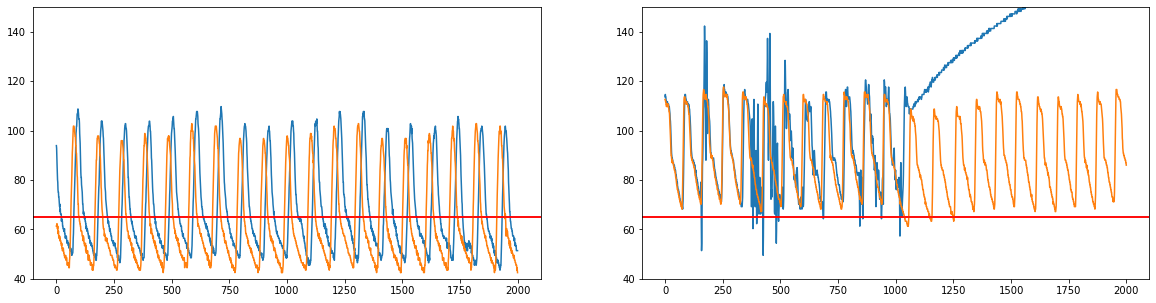

In [9]:
import matplotlib.pyplot as plt

# label값에 따른 파형 시각화를 통해 비교
fig, ax = plt.subplots(1,2 , figsize = (20,5))

label0_index = np.where(y_train==1)[0]

for i in range(4,6):
    ax[0].plot(x_train[label0_index][i])
    ax[0].set_ylim(40,150)
    ax[0].axhline(65, color = 'r')
    
for i in range(4,6):
    ax[1].plot(x_train[~label0_index][i])
    ax[1].set_ylim(40,150)
    ax[1].axhline(65 , color = 'r')


##### 검증용 데이터 분리(정규화 추가해줘야할듯)

In [10]:
# from sklearn.model_selection import train_test_split

# X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)


##### 제공 모델 사용

In [11]:
import tensorflow as tf
import os

from tqdm.notebook import tqdm
# from keras.models import Sequential
# from keras.models import Model, load_model
# from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPool1D, BatchNormalization, Dropout
# from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import auc, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score, precision_recall_curve
#tf.keras.callbacks

In [12]:
BATCH_SIZE = 512

x_train -= 65
x_train /= 65
x_test -= 65
x_test /= 65


# nan 을 이전 값으로 채움
x_train = pd.DataFrame(x_train).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values


print(' . . .')


x_test = pd.DataFrame(x_test).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values

 . . .


In [13]:
# CNN에 입력으로 넣기 위해 차원을 추가
x_train = x_train[..., None]
x_test = x_test[..., None]

In [14]:
num_nodes = [64, 64, 64, 64, 64, 64]

testname = '-'.join([str(num_node) for num_node in num_nodes])
print(testname)

64-64-64-64-64-64


In [15]:
import os
odir = "output"

if not os.path.exists(odir):
    os.mkdir(odir)
    
weight_path = odir + "/weights.hdf5"

##### Modeling

In [16]:
model = tf.keras.models.Sequential()

for num_node in tqdm(num_nodes):
    model.add(tf.keras.layers.Conv1D(filters=num_node, kernel_size=3, padding='valid'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling1D())

In [17]:
model.add(tf.keras.layers.GlobalMaxPool1D())
model.add(tf.keras.layers.Dense(32, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))



model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC(), 'accuracy'])

In [19]:
#이전에 잘 되던코드인데 갑자기 안됨.. GPU 문제
checkPoint = tf.keras.callbacks.ModelCheckpoint(monitor='val_loss', filepath=weight_path, verbose=1, save_best_only=True)
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')


hist = model.fit(x_train, y_train, 
                 validation_split=0.2, epochs=2, batch_size=BATCH_SIZE, class_weight=[1,10], 
                  callbacks=[checkPoint, earlyStop])

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run GatherV2: Dst tensor is not initialized. [Op:GatherV2]

In [ ]:
csvDF[csvDF[0]>0.5]

In [ ]:
len(csvDF[csvDF[0]>0.5])/ csvDF.shape[0]

In [ ]:
plt.plot(hist.history['auc'], label = 'Train')
plt.plot(hist.history['val_auc'], label = 'Val')
plt.legend()

##### csv파일 저장

In [ ]:
csvDF.to_csv('output/Submit1_baseline_CNN.csv', header= None , index = None)